In [1]:
from multiclass_functions_1 import *
import torch
from torchvision import datasets, transforms

In [2]:
BATCH_SIZE = 64
LR = 2e-3
EPOCH = 30
TRAIN_RATIO = 0.8
criterion = nn.CrossEntropyLoss()
new_model_train = False
model_type = "CNN_deep"
dataset = "STL10"
save_model_path = f"./result/{model_type}_{dataset}.pt"

In [3]:
transform_train = transforms.ToTensor()
transform_test = transforms.ToTensor()

In [4]:
transform = transforms.ToTensor()
train_DS = datasets.STL10(root = '/Users/sanghyun/Desktop/GIT_Folder', split='train', download=False, transform=transform_train)
test_DS = datasets.STL10(root  = '/Users/sanghyun/Desktop/GIT_Folder', split='test', download=False, transform=transform_test)

NoT = int(len(train_DS)*TRAIN_RATIO)
NoV = len(train_DS) - NoT

train_DS, val_DS= torch.utils.data.random_split(train_DS, [NoT, NoV])

val_DS.transform = transform_test # test의 transform 적용!

train_DL = torch.utils.data.DataLoader(train_DS, batch_size=BATCH_SIZE, shuffle=True)
val_DL = torch.utils.data.DataLoader(val_DS, batch_size=BATCH_SIZE, shuffle=True)
test_DL = torch.utils.data.DataLoader(test_DS, batch_size=BATCH_SIZE, shuffle=True)

In [4]:
print(train_DS)
print(test_DS)
print(len(train_DS))
print(len(test_DS))
print(test_DS.classes)

Dataset STL10
    Number of datapoints: 5000
    Root location: /Users/sanghyun/Desktop/GIT_Folder
    Split: train
    StandardTransform
Transform: ToTensor()
Dataset STL10
    Number of datapoints: 8000
    Root location: /Users/sanghyun/Desktop/GIT_Folder
    Split: test
    StandardTransform
Transform: ToTensor()
5000
8000
['airplane', 'bird', 'car', 'cat', 'deer', 'dog', 'horse', 'monkey', 'ship', 'truck']


In [ ]:
x_batch, y_batch = next(iter(test_DL))

In [32]:
print(x_batch.shape)
print(x_batch.dtype)

torch.Size([32, 3, 96, 96])
torch.float32


In [30]:
x_batch = x_batch.to(DEVICE)
y_batch = y_batch.to(DEVICE)

In [ ]:
plt.imshow(x_batch[7].permute(1, 2, 0))

In [6]:
class CNN_deep(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_block1 = nn.Sequential(nn.Conv2d(3,32,3,padding=1),
                                         nn.BatchNorm2d(32),
                                         nn.ReLU(),
                                         nn.Conv2d(32,32,3,padding=1),
                                         nn.BatchNorm2d(32),
                                         nn.ReLU())
        self.Maxpool1 = nn.MaxPool2d(2)

        self.conv_block2 = nn.Sequential(nn.Conv2d(32,64,3,padding=1),
                                         nn.BatchNorm2d(64),
                                         nn.ReLU(),
                                         nn.Conv2d(64,64,3,padding=1),
                                         nn.BatchNorm2d(64),
                                         nn.ReLU(),
                                         nn.Conv2d(64,64,3,padding=1),
                                         nn.BatchNorm2d(64),
                                         nn.ReLU())
        self.Maxpool2 = nn.MaxPool2d(2)

        self.conv_block3 = nn.Sequential(nn.Conv2d(64,128,3,padding=1),
                                         nn.BatchNorm2d(128),
                                         nn.ReLU(),
                                         nn.Conv2d(128,128,3,padding=1),
                                         nn.BatchNorm2d(128),
                                         nn.ReLU(),
                                         nn.Conv2d(128,128,3,padding=1),
                                         nn.BatchNorm2d(128),
                                         nn.ReLU())
        self.Maxpool3 = nn.MaxPool2d(2)

        self.classifier = nn.Sequential(nn.Linear(128*12*12,512),
                                        nn.Linear(512,10))

    def forward(self, x):
        x = self.conv_block1(x)
        x = self.Maxpool1(x)
        x = self.conv_block2(x)
        x = self.Maxpool2(x)
        x = self.conv_block3(x)
        x = self.Maxpool3(x)
        x = torch.flatten(x, start_dim=1)
        x = self.classifier(x)
        return x

In [36]:
# for test
model = CNN_deep().to(DEVICE)
#print(model(x_batch).shape)

In [6]:
exec(f"model = {model_type}().to(DEVICE)")
print(model)

CNN_deep(
  (conv_block1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
  )
  (Maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_block2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): BatchNorm2d(64, eps=1e-05, momentum=

Epoch 1/30:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 1, train loss: 9.165
--------------------


Epoch 2/30:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 2, train loss: 1.928
--------------------


Epoch 3/30:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 3, train loss: 1.719
--------------------


Epoch 4/30:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 4, train loss: 1.582
--------------------


Epoch 5/30:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 5, train loss: 1.505
--------------------


Epoch 6/30:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 6, train loss: 1.434
--------------------


Epoch 7/30:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 7, train loss: 1.349
--------------------


Epoch 8/30:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 8, train loss: 1.281
--------------------


Epoch 9/30:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 9, train loss: 1.268
--------------------


Epoch 10/30:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 10, train loss: 1.205
--------------------


Epoch 11/30:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 11, train loss: 1.083
--------------------


Epoch 12/30:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 12, train loss: 1.017
--------------------


Epoch 13/30:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 13, train loss: 0.962
--------------------


Epoch 14/30:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 14, train loss: 1.015
--------------------


Epoch 15/30:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 15, train loss: 0.857
--------------------


Epoch 16/30:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 16, train loss: 0.782
--------------------


Epoch 17/30:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 17, train loss: 0.713
--------------------


Epoch 18/30:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 18, train loss: 0.653
--------------------


Epoch 19/30:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 19, train loss: 0.564
--------------------


Epoch 20/30:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 20, train loss: 0.459
--------------------


Epoch 21/30:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 21, train loss: 0.406
--------------------


Epoch 22/30:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 22, train loss: 0.373
--------------------


Epoch 23/30:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 23, train loss: 0.311
--------------------


Epoch 24/30:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 24, train loss: 0.227
--------------------


Epoch 25/30:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 25, train loss: 0.261
--------------------


Epoch 26/30:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 26, train loss: 0.235
--------------------


Epoch 27/30:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 27, train loss: 0.177
--------------------


Epoch 28/30:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 28, train loss: 0.167
--------------------


Epoch 29/30:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 29, train loss: 0.162
--------------------


Epoch 30/30:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch: 30, train loss: 0.128
--------------------


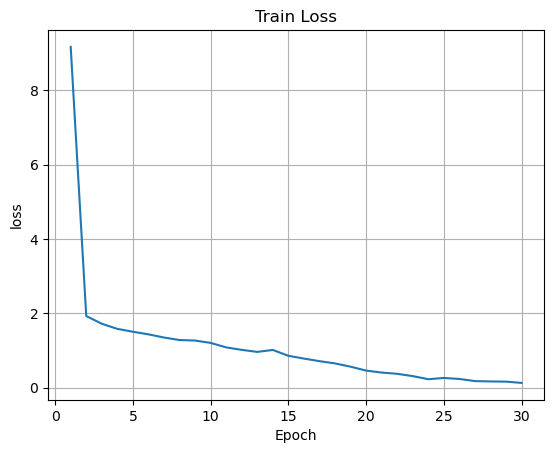

In [7]:
if new_model_train:
    optimizer = optim.Adam(model.parameters(), lr=LR)
    loss_history = Train(model, train_DL, criterion, optimizer, EPOCH)

    torch.save(model, save_model_path)

    plt.plot(range(1,EPOCH+1),loss_history)
    plt.xlabel('Epoch')
    plt.ylabel('loss')
    plt.title("Train Loss")
    plt.grid()

In [7]:
load_model = torch.load(save_model_path, map_location=DEVICE, weights_only=False)

In [8]:
Test(load_model, test_DL)

Test accuracy: 4497/8000 (56.2 %)


9915626


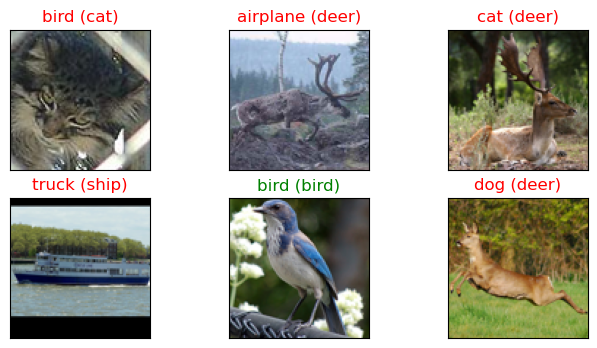

In [9]:
Test_plot(load_model, test_DL)
print(count_params(load_model))